In [2]:
%load_ext autoreload
%autoreload 2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from rk4 import rk4
from wd_setup import WhiteDwarf

In [3]:
M_SOLAR = 1.98e33

-3.334998398254935e-09 -7.426796837052641e-10 -7.382786161157159e-09 5.2496e-33
-3.334998398254935e-09 -7.426796837052641e-10 -7.382786161157159e-09 5.2496e-33
-4.768971955726096 -2.9707175465328225e-23 -7.321162931157499 5.2495999999980616e-33
-4.76722613980898 -2.9696300911748886e-23 -7.31953438298242 5.2476783411538306e-33
-1.1913813440639138 -7.42135928330029e-24 -1.829493586811559 5.245757537230309e-33
-1.1916358342772877 -7.422944448359538e-24 -1.8297310203362316 5.2468780046864564e-33
-1.1916358342772877 -7.422944448359538e-24 -1.8297310203362316 5.2468780046864564e-33
-0.5295806317733353 -3.2987846627934867e-24 -0.8131888043762769 5.246397736888237e-33
-0.5296075680216379 -3.298952432826989e-24 -0.8132139355037993 5.246664558889083e-33
-0.29790656105710894 -1.855585308311488e-24 -0.4574436803106486 5.246451099898872e-33
-0.2979032780948257 -1.8555648630669627e-24 -0.45744061719709045 5.2463932933538706e-33
-0.2979032780948257 -1.8555648630669627e-24 -0.45744061719709045 5.24639

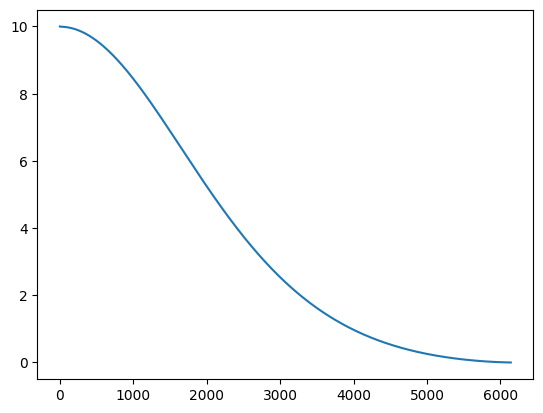

In [ ]:
rhoc_scaled = 1e1
Ye = 0.5
k = 1.36e-12

wd1 = WhiteDwarf(Ye=Ye, rhoc_scaled=rhoc_scaled, Z=6, k=k)

# Initial conditions
r = 1e-10
state = np.array([rhoc_scaled, (1/3) * rhoc_scaled * (r ** 3)]) # [density, mass]
dr = 1e-3

R_history = []
M_history = []
rho_history = []

t1_history = []
t2_history = []
t3_history = []
P_history = []

while state[0] > 0:
    R_history.append(r)
    rho_history.append(state[0])
    M_history.append(state[1])
    
    _, TOV = wd1.get_derivative(rb=r, state=state)

    t1_history.append(TOV[0]-1)
    t2_history.append(TOV[1]-1)
    t3_history.append(TOV[2])
    P_history.append(TOV[3])
    state = rk4(wd1.get_derivative, dr=dr, rb=r, state=state)
    
    r += dr

R_history = np.array(R_history)
M_history = np.array(M_history)
rho_history = np.array(rho_history)

plt.plot(R_history * wd1.R0 / 100 / 1000, rho_history)

100%|██████████| 100/100 [00:04<00:00, 24.59it/s]


Text(0, 0.5, 'M ($M_\\odot$)')

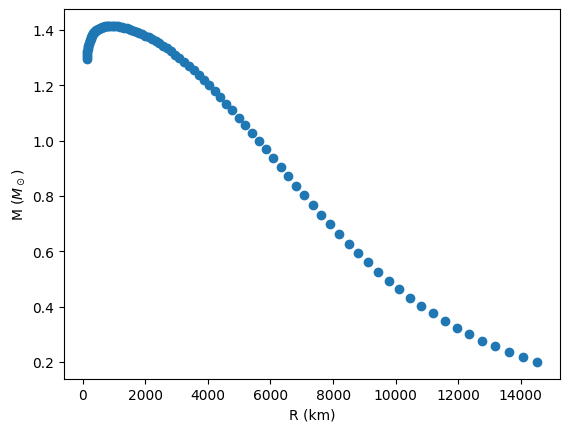

In [49]:
M = []
R = []
dr=1e-3

rhoc_scaled = np.logspace(-1, 7, 100)
for rhoc in tqdm(rhoc_scaled):

    wd1 = WhiteDwarf(Ye=Ye, rhoc_scaled=rhoc_scaled, Z=6, k=k)

    # Initial conditions
    r = 1e-10
    state = np.array([rhoc, (1/3) * rhoc * (r ** 3)]) # [density, mass, pressure]

    while state[0] > 1e-10:
        state = rk4(wd1.get_derivative, dr=dr, rb=r, state=state)
        
        r += dr

    R.append(r)
    if np.isnan(state[1]):
        print(rhoc)
    M.append(state[1])

R = np.array(R)
M = np.array(M)

plt.scatter(R * wd1.R0 / (1000 * 100), M * wd1.M0 / M_SOLAR)
plt.xlabel("R (km)")
plt.ylabel(r"M ($M_\odot$)")

In [259]:
wd1.rho0

1958000.0